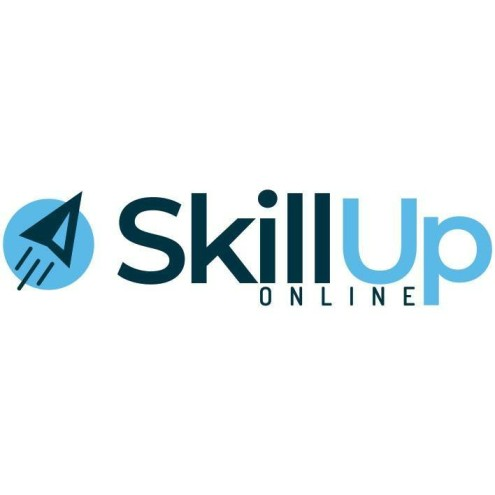

# **Credit Card Fraud Detection with Random Forest**

**1. What is the business objective?**

Credit card fraud detection is a critical business objective that helps financial institutions minimize losses and protect customers. This will enhance customer trust and retention.

By identifying suspicious activities in real-time, the organization can take immediate action to prevent fraud, thus protecting both their assets and their customers.
This por

**2. Is it a classification, regression, clustering, or recommendation problem?**

This project is a classification problem. The goal is to classify transactions as either fraudulent or non-fraudulent based on various transaction features. The model learns from historical transaction data labeled with these categories to make predictions on new, unseen transactions.

**3. What are the success metrics?**
The success metrics for evaluating the model's performance in credit card fraud detection typically include:

**Accuracy:** The ratio of correctly predicted instances (both fraudulent and non-fraudulent) to the total instances. However, accuracy can be misleading in imbalanced datasets like fraud detection.

**Precision:** The ratio of true positive predictions to the total positive predictions. It indicates how many of the predicted fraudulent transactions were actually fraudulent.

**Recall (Sensitivity):** The ratio of true positive predictions to the total actual positives. It shows how many of the actual fraudulent transactions were correctly identified.

**F1-score:** The harmonic mean of precision and recall. It provides a balance between the two metrics, especially important in cases of imbalanced datasets.

**ROC-AUC:** The area under the Receiver Operating Characteristic curve, which illustrates the model's ability to distinguish between the two classes across different thresholds.

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Import necessary libraries ###

In [3]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

### Import y organize el dataset

In [4]:
# Organizar los datos en un dataframe
df=pd.read_csv("/content/creditcard.csv")
df
#df.dtypes

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0



<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Clean the Data

a. Lost values

In [16]:
#Escribe tu código aquí. SGC Comentario: No hay valores perdidos
Per=df.isnull().sum()



In [17]:
dfrau=df[(df['Class']==1)]


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Duplicated Values

In [5]:
#Escribe tu código aquí. SGC comentario: Hay 1081 datos duplicados 284807 - 283726 = 1081
duplicate_count=df.duplicated().sum()
duplicate_count
dfc=df.drop_duplicates()
dfc


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
dfc.dropna(inplace=True)
nan_count = dfc.isnull().sum().sum()
print(f"Total NaN values in DataFrame: {nan_count}")


Total NaN values in DataFrame: 0


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analyze the data

Question 1: What is the percentage of fraudalents Transactions?



In [20]:
# Calcula el porcentaje de transacciones fraudulentas
Frau=(dfc['Class']==1).sum()
TotalT=dfc['Class'].count()
# Muestra el porcentaje de transacciones fraudulentas
print(f"el porcentaje de transacciones fraudulentas es: {(Frau/TotalT)*100}")

el porcentaje de transacciones fraudulentas es: 0.1667101358352777


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Question 2: What is the average amount of fraudulent transactions?



In [21]:
# Calcula el importe medio de las transacciones fraudulentas
dfrau=dfc[(dfc['Class']==1)]

frau_mean=dfrau['Amount'].mean()

# Muestra el importe medio de las transacciones fraudulentas
print(f"el importe medio de las transacciones fraudulentas: {round(frau_mean,2)}")

el importe medio de las transacciones fraudulentas: 123.87


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Data Visualization

Question 1: How many fraudulent transactions are there compared to non-fraudulent ones? (Use a bar graph)

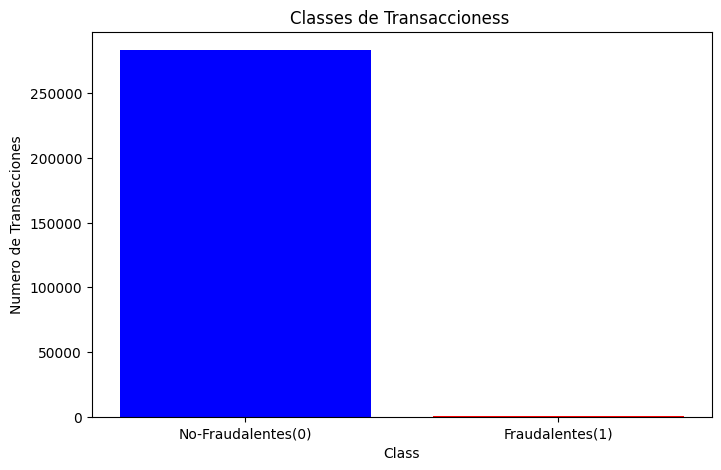

In [22]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
classC=dfc['Class'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(classC.index, classC.values, color=['blue','red'])
plt.xlabel('Class')
plt.ylabel('Numero de Transacciones')
plt.title('Classes de Transaccioness ')
plt.xticks([0,1], ['No-Fraudalentes(0)', 'Fraudalentes(1)'])
plt.show()
# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Question 2: What is the distribution of the amounts of fraudulent transactions? (Use a histogram)


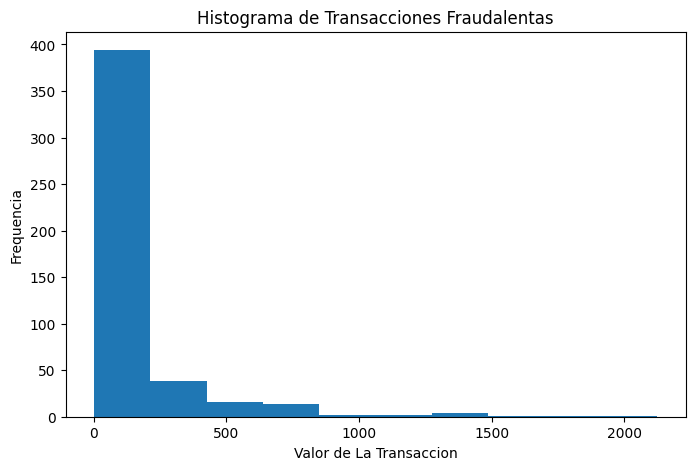

In [23]:
# Separa los datos de transacciones fraudulentas
dfrau=dfc[(dfc['Class']==1)]

# Muestra la distribución de los importes de las transacciones fraudulentas
plt.figure(figsize=(8, 5))
plt.hist(dfrau['Amount'])
plt.xlabel('Valor de La Transaccion')
plt.ylabel('Frequencia')
plt.title('Histograma de Transacciones Fraudalentas')
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Model development and evaluation

### Split the dataset: training data and test data

In [64]:
import random
np.random.seed(42)
random.seed(42)

In [24]:
# Separa los datos de entrenamiento y evaluación
import pandas as pd
from sklearn.model_selection import train_test_split
X = dfc.drop('Class', axis =1)
y = dfc['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Create and evaluate models

In [25]:
#Escribe tu código aquí

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score

model = RandomForestClassifier( n_estimators=5, max_depth=150, random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Calculate the overall accuracy of the model with the evaluation data.

In [26]:
accuracy=accuracy_score(y_test, y_pred)
print(f"The overall accuracy of the model is: {round(accuracy * 100, 3)}%")

The overall accuracy of the model is: 99.947%


In [27]:
report = classification_report(y_test, y_pred)


### Classification Report

In [28]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.94      0.71      0.81        90

    accuracy                           1.00     56746
   macro avg       0.97      0.86      0.90     56746
weighted avg       1.00      1.00      1.00     56746



### Confusion Matrix

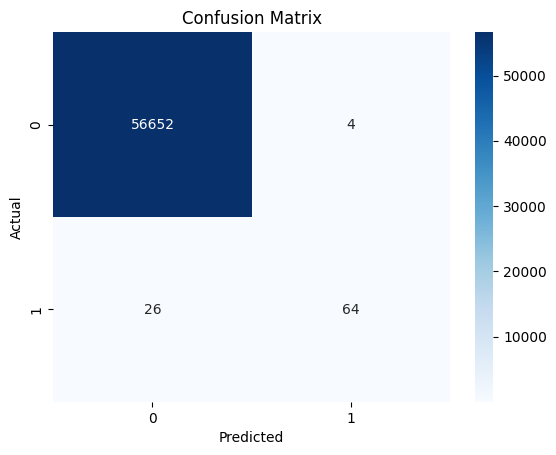

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


True Negatives (Class 0) = 56,652
False Negatives = 0.29 × 90 = 26

False Positives (Class 1) = 4
True Positives (Class 1) = 0.71 × 90 = 64


Class 0: Precision 1, the model predicts class 0 with 100% accuracy.

Recall 1, the model correctly identifies all class 0 instances.

F1-score 1, confirms that class 0 is perfectly classified.

Support 56,656, the model found 56,656 instances of class 0 in the test dataset.

Class 1: Precision 0.94, when the model predicts class 1, it is correct 94% of the time. 6% are false positives.

Recall: 0.71, the model identified 71% of the instances correctly, meaning that 29% of the time class 1 is classified incorrectly, given that there is no balance between class 0 and class 1.

F1-score: 0.81, when the F1-score is low, it indicates that the model does not classify the minority class (class 1) adequately.

Support 90, class 1 appears only 90 times in the test dataset.

This indicates that there is a significant imbalance between classes 0 and 1.

Observations: Significant imbalance between classes 1 and 0. The model performs well with class 0 but has difficulties with class 1.

Performance in class 1: The precision for class 1 is high (94%), but the recall is lower (71%). The model does not detect all true cases of class 1.

**The ROC (Receiver Operating Characteristic)** curve is a graphical representation used to evaluate the performance of a binary classification model at various threshold settings.

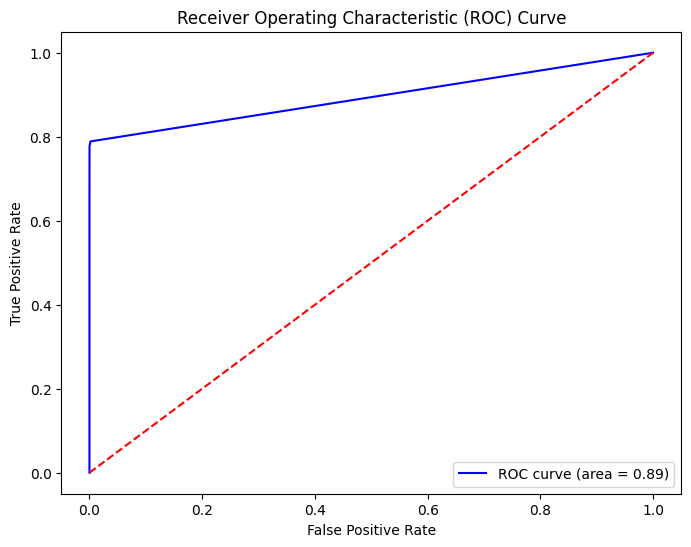

In [30]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

y_true = y_test
y_scores = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Understanding the ROC Curve
Axes:

**True Positive Rate (TPR)**: Also known as Sensitivity or Recall, it is the ratio of correctly predicted positive observations to all actual positives. TPR is plotted on the Y-axis.

**False Positive Rate (FPR)**: This is the ratio of incorrectly predicted positive observations to all actual negatives. FPR is plotted on the X-axis.
The Curve:

The ROC curve itself is created by plotting the TPR against the FPR at various threshold levels.

A model that perfectly classifies all positive and negative instances will have a point at (0,1), which means it has a TPR of 1 and an FPR of 0.
The Dotted Red Line:

The red dotted line in the ROC curve plot represents the line of no discrimination or a random classifier.

This line runs diagonally from the bottom-left corner (0,0) to the top-right corner (1,1) of the plot. If a model performs no better than random chance, it will lie along this line.

Any curve above this line indicates that the model is performing better than random guessing. The further away the curve is from the red line, the better the model's performance.

**Interpretation of  ROC Curve**
Completely Vertical until 0.8:
This suggests that the model has a high True Positive Rate at 0 False Positive Rate. The vertical part means that for a range of predicted probabilities, have a very high rate of correctly identifying positive cases (class 1) without increasing the number of false positives (class 0).

**Smoothly Reaching 0.92:**
Once reaching the threshold of 0.8, the curve starts to level off, indicating that while the model continues to correctly identify positive cases, it does so at the cost of increasing false positives.

**The maximum point of 0.92 signifies a balance between the TPR and FPR**, indicating improved model performance as moving through the threshold values.

**Overall Meaning**
The ROC curve allows to visualize how well the model can distinguish between the two classes (fraud vs. non-fraud in the case).

**The area under the ROC curve (AUC)** is a summary measure of the model's performance across all thresholds. An AUC of 0.5 indicates no discriminative ability, while an AUC of 1.0 indicates perfect discrimination.

If the ROC curve is significantly above the diagonal line, it indicates that the model is effectively identifying fraud cases while minimizing false alarms (non-fraud cases incorrectly predicted as fraud).

**Conclusion**

Overall, the ROC curve is an essential tool for evaluating the performance of classification models, especially in scenarios like fraud detection where the class distribution can be highly imbalanced.

By analyzing the ROC curve and the AUC, can make informed decisions about model selection and threshold tuning to achieve the desired balance between sensitivity and specificity.

In [22]:
!pip install matplotlib graphviz


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>

**2. Precision-Recall Curve**


The precision-recall curve is particularly useful for imbalanced datasets.
It plots precision against recall for different thresholds.

**What is the Precision-Recall Curve?**

The Precision-Recall curve is a graphical representation of a classifier’s precision and recall across different threshold values.

It helps assess how well the model performs in distinguishing between positive (e.g., fraud) and negative (e.g., non-fraud) classes.

**Components of the Precision-Recall Curve Precision: **

**Definition:** Precision is the ratio of true positive predictions (correctly identified positive cases) to the total predicted positives (true positives + false positives).
Formula:

Precision
=
True Positives
True Positives
+
False Positives

Precision=
True Positives+False Positives
True Positives
​

**Interpretation:** High precision indicates that when the model predicts a positive class, it is mostly correct.

In fraud detection, this means fewer legitimate transactions are incorrectly classified as fraud.

Recall (also known as Sensitivity or True Positive Rate):

Definition: Recall is the ratio of true positive predictions to the actual positives (true positives + false negatives).

Formula:

Recall
=
True Positives
True Positives
+
False Negatives

Recall=
True Positives+False Negatives
True Positives
​

**Interpretation:** High recall indicates that the model correctly identifies a large proportion of actual positive cases.

In fraud detection, it means the model successfully detects most of the fraudulent transactions.

**How the PR Curve Works**
Threshold Adjustment: The PR curve is created by varying the threshold for classifying a positive case.

As the threshold changes, the values for precision and recall are calculated, producing points on the graph.

X-axis and Y-axis:

X-axis: Recall (from 0 to 1)
Y-axis: Precision (from 0 to 1)

**Interpreting the PR Curve**

**Shape of the Curve:**

A curve that rises steeply before leveling off indicates a good balance between precision and recall.

If the curve hugs the axes or falls quickly, it suggests that the model struggles to achieve a good precision-recall trade-off.

**Area Under the Curve (AUC):**

The area under the PR curve (AUC-PR) provides a single score to evaluate the model. An AUC close to 1 indicates better performance, while an AUC close to 0.5 suggests the model is not performing better than random guessing.

**Class Imbalance:**

The PR curve is particularly useful in scenarios where the positive class (e.g., fraud) is rare compared to the negative class (e.g., non-fraud). Unlike the ROC curve, which may give an overly optimistic view of performance in imbalanced datasets, the PR curve emphasizes performance on the positive class.

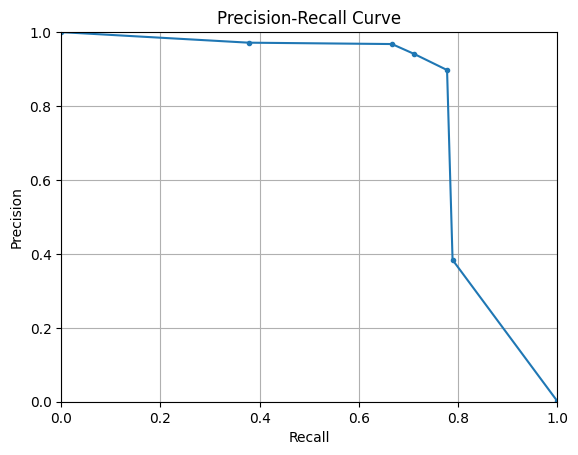

In [31]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_scores)  # y_scores are the predicted probabilities
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.show()


**Conclusiosn in PR Curve**
**High Precision Initially:**

**Precision ~ 1:** The model demonstrates very high precision when the recall is low (up to recall = 0.8).

This means that when the model predicts a positive case (e.g., fraud), it is correct almost 100% of the time.

In other words, very few legitimate transactions are misclassified as fraudulent in this region.
Drop in Precision After Recall = 0.8:

**Sharp Drop:** After reaching a recall of approximately 0.8, precision begins to decrease sharply.

This indicates that as the model starts to classify more instances as positive (increasing recall), it is beginning to make more false positive predictions.

In other words, while the model is catching more actual fraud cases, it is also misclassifying more legitimate transactions as fraud.
Imbalance Between Precision and Recall:

This pattern suggests that the model is very effective at identifying fraud cases when the threshold is set low (resulting in high recall), but as adjusting the threshold to increase recall further, the model's precision suffers.

This is typical in many classifiers, particularly in imbalanced datasets where the minority class (fraud) is much smaller than the majority class (non-fraud).

**Key Takeaways**

**Trade-off Between Precision and Recall**:

The model exhibits a classic trade-off between precision and recall. High recall (catching most fraudulent transactions) often comes at the expense of precision (increasing the number of false positives).

**Threshold Selection:**

Depending on the business objective,  might choose a threshold that balances precision and recall according to the specific needs:
If the priority is to minimize false positives (e.g., to avoid inconveniencing legitimate customers), might opt for a higher threshold, sacrificing some recall for better precision.

Conversely, if catching fraud is paramount, might choose a lower threshold, accepting a decline in precision.

**Evaluate with Domain Knowledge:**

Consider the cost of false positives versus false negatives in the application.

In credit card fraud detection, false negatives (missing fraud cases) can lead to significant financial loss, while false positives (incorrectly flagging legitimate transactions) can lead to customer dissatisfaction.

**3. Feature Importance Bar Plot**


For models like Random Forest or XGBoost, one can visualize feature importance to understand which features are most influential in making predictions.

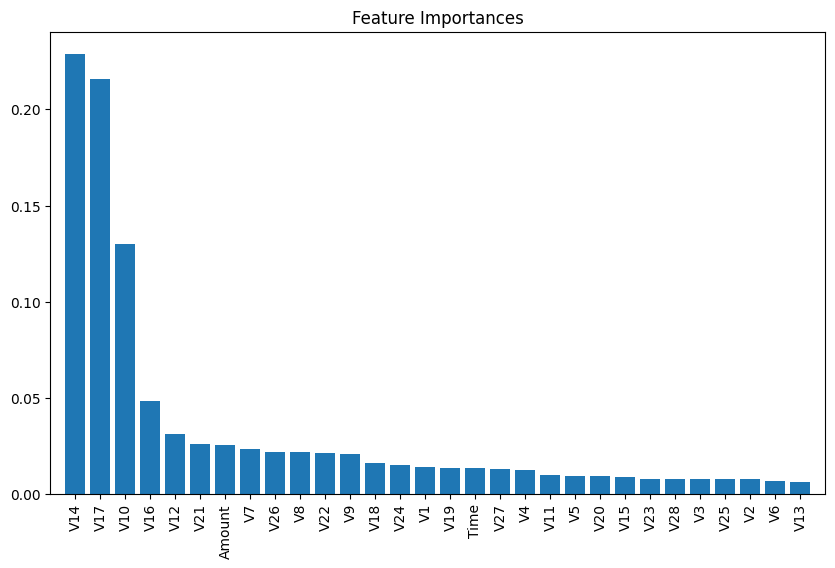

In [32]:
importances = model.feature_importances_  # If using Random Forest or similar
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()


                           V1        V2        V3        V4        V5  \
Time                                                                    
2024-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
2024-01-01 00:00:01  1.191857  0.266151  0.166480  0.448154  0.060018   
2024-01-01 00:00:02 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
2024-01-01 00:00:03 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
2024-01-01 00:00:04 -1.158233  0.877737  1.548718  0.403034 -0.407193   

                           V6        V7        V8        V9       V10  ...  \
Time                                                                   ...   
2024-01-01 00:00:00  0.462388  0.239599  0.098698  0.363787  0.090794  ...   
2024-01-01 00:00:01 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  ...   
2024-01-01 00:00:02  1.800499  0.791461  0.247676 -1.514654  0.207643  ...   
2024-01-01 00:00:03  1.247203  0.237609  0.377436 -1.387024 -0.054952  ...   
2024-01-01 00:00:04 

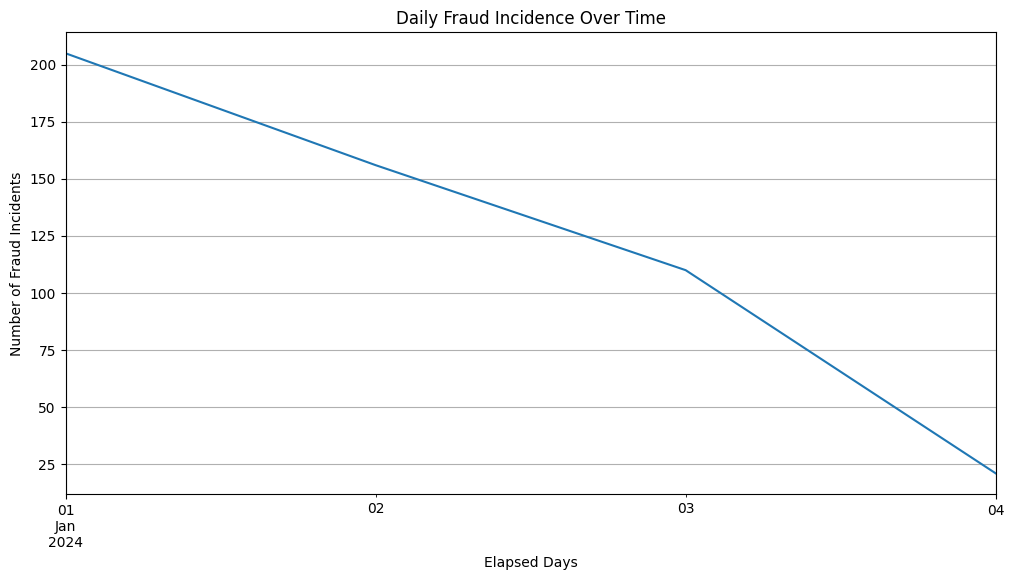

In [33]:

import pandas as pd
import matplotlib.pyplot as plt



# Define the start date and the time increment
start_date = pd.Timestamp("2024-01-01")
time_interval = '1S'  # 1 second interval;  can adjust this (e.g., '1T' for 1 minute)

# Generate a date range for the length of the DataFrame
df['Time'] = pd.date_range(start=start_date, periods=len(df), freq=time_interval)

# Optionally set 'Time' back as the index if required for time series analysis
df = df.set_index('Time')

# Now 'Time' is in datetime format starting from 2024, as the index
print(df.head())

# Filter for Fraud Cases
df_fraud = df[df['Class'] == 1]

# Resample by day (or desired frequency) and count incidents
daily_fraud = df_fraud.resample('D').size()

# Plot the Daily Fraud Incidents Over Time
plt.figure(figsize=(12, 6))
daily_fraud.plot()
plt.title('Daily Fraud Incidence Over Time')
plt.xlabel('Elapsed Days')
plt.ylabel('Number of Fraud Incidents')
plt.grid()
plt.show()




Lasso Model: MSE = 10.5988, R^2 = 0.9997
Ridge Model: MSE = 0.0720, R^2 = 1.0000
Elastic Net Model: MSE = 4447.0222, R^2 = 0.8851

Comparison of Models:
                     MSE        R2
Lasso          10.598757  0.999726
Ridge           0.072016  0.999998
Elastic Net  4447.022215  0.885116


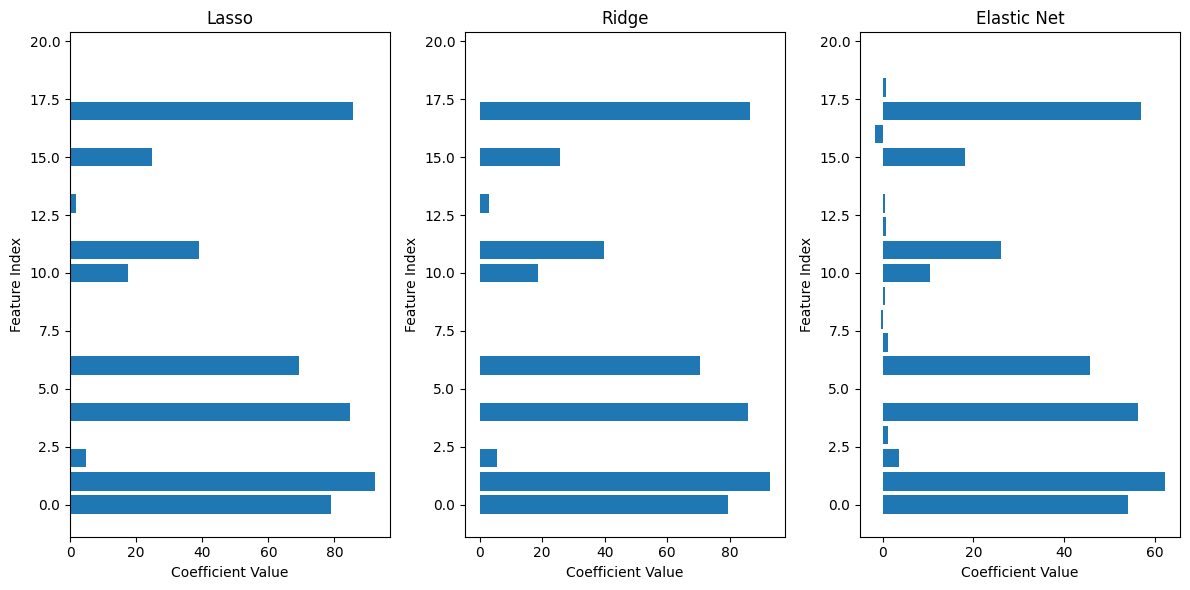

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate Sample Data
X, y, coef = make_regression(n_samples=280000, n_features=20, noise=0.1, coef=True, random_state=42)
X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(20)])
y = pd.Series(y)

# Step 2: Split Data into Training and Test Sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize Models with Default Alpha (Regularization Strength)
alpha = 1.0  #  adjust this value based on cross-validation results
lasso = Lasso(alpha=alpha)
ridge = Ridge(alpha=alpha)
elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio determines the mix of Lasso and Ridge

# Step 5: Train and Evaluate Each Model
models = {'Lasso': lasso, 'Ridge': ridge, 'Elastic Net': elastic_net}
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} Model: MSE = {mse:.4f}, R^2 = {r2:.4f}")

# Step 6: Compare Results
results_df = pd.DataFrame(results).T
print("\nComparison of Models:")
print(results_df)

# Optional: Visualize Model Coefficients
plt.figure(figsize=(12, 6))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    plt.subplot(1, 3, i + 1)
    plt.barh(range(len(model.coef_)), model.coef_)
    plt.title(name)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Index')
plt.tight_layout()
plt.show()


## Model Performance Metrics

### 1. Mean Squared Error (MSE)
- **Definition**: MSE measures the average of the squares of the errors—that is, the average squared difference between the predicted and actual values. Lower values indicate better model performance.
- **Results**:
  - **Lasso**: MSE = 10.5988
  - **Ridge**: MSE = 0.0720
  - **Elastic Net**: MSE = 4447.0222
- **Interpretation**:
  - The Ridge model has the lowest MSE, indicating it makes predictions closest to the actual values.
  - The Lasso model has a significantly higher MSE, suggesting it performs less well in terms of prediction accuracy.
  - The Elastic Net model has a very high MSE, indicating poor performance.

### 2. R-squared (R²)
- **Definition**: R² indicates the proportion of the variance in the dependent variable that can be explained by the independent variables. Values range from 0 to 1.
- **Results**:
  - **Lasso**: R² = 0.9997
  - **Ridge**: R² = 1.0000
  - **Elastic Net**: R² = 0.8851
- **Interpretation**:
  - The Ridge model explains 100% of the variance.
  - The Lasso model explains a very high percentage of the variance.
  - The Elastic Net model explains only 88.51% of the variance.

## Summary of Results
- **Ridge Regression** is the best-performing model based on these metrics.
- **Lasso Regression** performs reasonably well.
- **Elastic Net** performs the worst in this comparison.

## Considerations for Model Selection
1. **Overfitting vs. Underfitting**:
2. **Model Complexity**:
3. **Feature Selection**:
4. **Real-World Application**:

## Conclusion
Given the metrics,   **Ridge regression**may be best as final model.


**4. Histogram of Prediction Probabilities**

Visualize the distribution of predicted probabilities for the positive class (fraud) to see how well the model distinguishes between classes.

In [50]:
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())

In [52]:
y_train = (y_train >= 0.5).astype(int)  # Adjust threshold as needed
y_test = (y_test >= 0.5).astype(int)

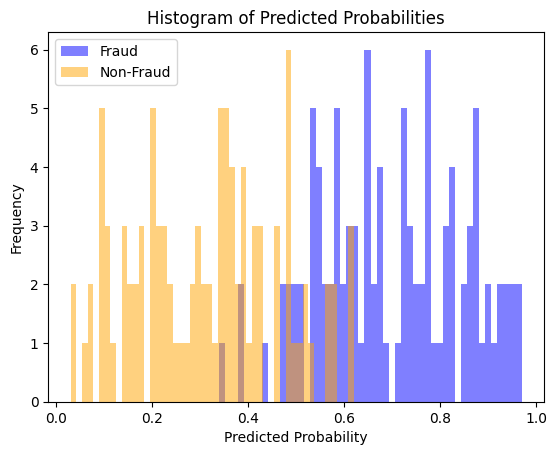

In [53]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Use RandomForestClassifier as the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Make sure X_train and y_train are correctly defined for training

# Get predicted probabilities for the test set
y_scores_test = model.predict_proba(X_test)[:, 1]  # Probability for the positive class (Fraud)

# Plot histograms of predicted probabilities for each class
plt.hist(y_scores_test[y_test == 1], bins=50, alpha=0.5, color="blue", label='Fraud')
plt.hist(y_scores_test[y_test == 0], bins=50, alpha=0.5, color="orange", label='Non-Fraud')

# Labeling the plot
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()




**5. Learning Curve**

A learning curve can help understand how the training and validation scores change with the size of the training dataset.
This can give insight into whether the model is overfitting or underfitting.


**Key Concepts**
Overfitting: This occurs when the model learns the training data too well, including its noise and outliers.
As a result, it performs excellently on the training data but poorly on unseen (validation or test) data. This typically happens when the model is too complex.

**Underfitting:** This occurs when the model is too simple to capture the underlying patterns in the data. It performs poorly on both training and unseen data. This usually happens when the model lacks the capacity to learn from the data effectively.

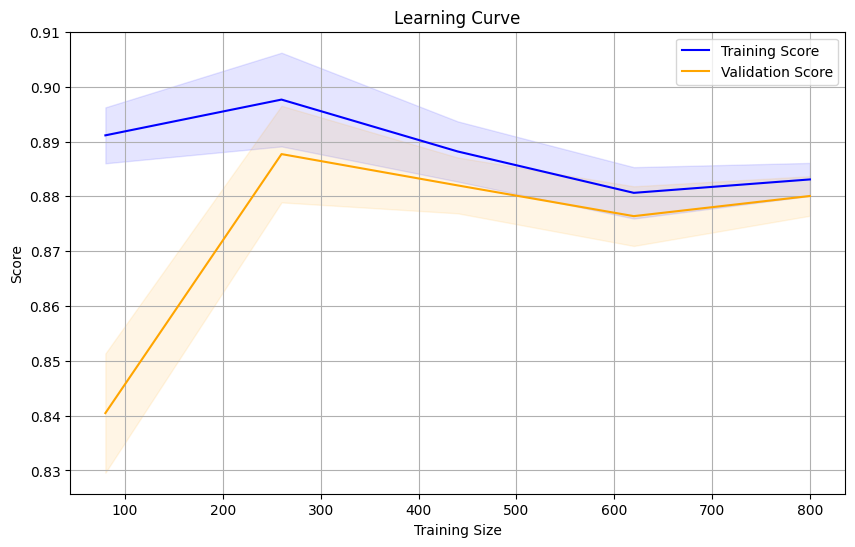

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores.std(axis=1),
                 train_scores_mean + train_scores.std(axis=1),
                 color='blue', alpha=0.1)
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores.std(axis=1),
                 test_scores_mean + test_scores.std(axis=1),
                 color='orange', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


**Learning Curve**
A learning curve plots the model's performance on the training set and validation set against the number of training samples. Here’s how to interpret it:

**Axes:**

X-Axis: The size of the training dataset.
Y-Axis: The performance metric (e.g., accuracy, F1-score).

Two Lines:

**Training Score:** Performance of the model on the training dataset.

**Validation Score:** Performance of the model on a separate validation dataset.
Interpretation
Both Scores Converging:

If both training and validation scores converge to a high value as  adding more training data, the model is well-fit.

**Training Score High, Validation Score Low (Overfitting):**

If the training score is high, but the validation score is low and they diverge, it indicates overfitting.

The model learns the training data well but fails to generalize to new data.

**Both Scores Low (Underfitting):**

If both scores are low, it indicates underfitting.

The model is too simple to capture the underlying structure in the data.

**Gap Between Scores:**

A large gap between the training and validation scores typically signals overfitting. A smaller gap indicates better generalization.

**Key Observations**

Initial Drop in the Training Curve
Explanation: When the training accuracy or score starts high (like 0.899) and then drops, it could indicate an initial overfitting to a small portion of the data.

**Reason:**  The model may initially memorize smaller subsets, leading to artificially high scores, but as it generalizes to more data, it struggles to retain that level of memorization. The accuracy decreases as the model "corrects" itself toward a less overfitted state.

**1. Initial Drop** in the Training Curve
Explanation: When the training accuracy or score starts high (like 0.899) and then drops, it could indicate an initial overfitting to a small portion of the data.

**Reason:** The model may initially memorize smaller subsets, leading to artificially high scores, but as it generalizes to more data, it struggles to retain that level of memorization. The accuracy decreases as the model "corrects" itself toward a less overfitted state.

**2. Validation Curve** Rising Over Time
Explanation: When the validation curve starts at a lower value (0.84) and rises, it’s often a good sign, showing that the model is improving in generalizing to unseen data.
Reason: This suggests that the model is learning and finding patterns that generalize well to new data rather than memorizing training data (overfitting).
Summary so far: This pattern (training score decreasing while validation score increasing) generally signals reduction of overfitting and movement toward a better fit.

**3. Convergence** of Training and Validation Curves
Explanation: As both curves eventually settle around a similar score (0.88), the model could be reaching a balance. If the training score doesn’t continue to decrease too drastically and the validation score doesn’t start to drop significantly, this can mean that the model is in a well-fitted state where it’s neither overfitting nor underfitting.

**Reason:** When the model balances, it has captured enough generalizable patterns without fitting too tightly to the training data. This would mean it has moved away from high variance (overfitting) and is stabilizing.

**4. Why Results** Changed on a Rerun
Randomness in the Model: Even with a set random state, small changes in the data processing steps or initialization of the notebook can introduce variability.

**Variance from Small n_estimators** (if not updated): If the n_estimators is still low (like 5), this can cause substantial variance, as a small set of decision trees can be sensitive to the specific data split, leading to fluctuating results between runs.
Convergence Due to Regularization: if had adjusted parameters (like using Lasso or Ridge in a previous session), the change in constraints or regularization could have shifted how quickly or smoothly the model fits, impacting both training and validation scores.

**Overfitting** and Underfitting Summary
In this scenario:

**Initial Overfitting:** Training accuracy starts high due to the model overfitting on early training data.
Learning and Underfitting Correction: As training continues, the model reduces overfitting, leading to better generalization as seen by improved validation scores.

**Balanced Fit:** Finally, both curves converge near 0.88, suggesting the model has reached a point of balance where it’s not memorizing training data excessively nor failing to capture key patterns (avoiding underfitting).

In [28]:
!pip install matplotlib graphviz




In [58]:
from sklearn.tree import plot_tree


**Handling Class Imbalance:**

**SMOTE** is applied to balance the classes in the dataset.

**Data Resampling (SMOTE)** Variability
SMOTE (Synthetic Minority Over-sampling Technique) : Since SMOTE generates synthetic samples for the minority class, it introduces randomness in how these samples are created.

The synthetic points are chosen based on nearest neighbors and vary slightly each time it runs SMOTE, affecting the model's learned patterns.

In [55]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.2 MB/s eta 0:00:00


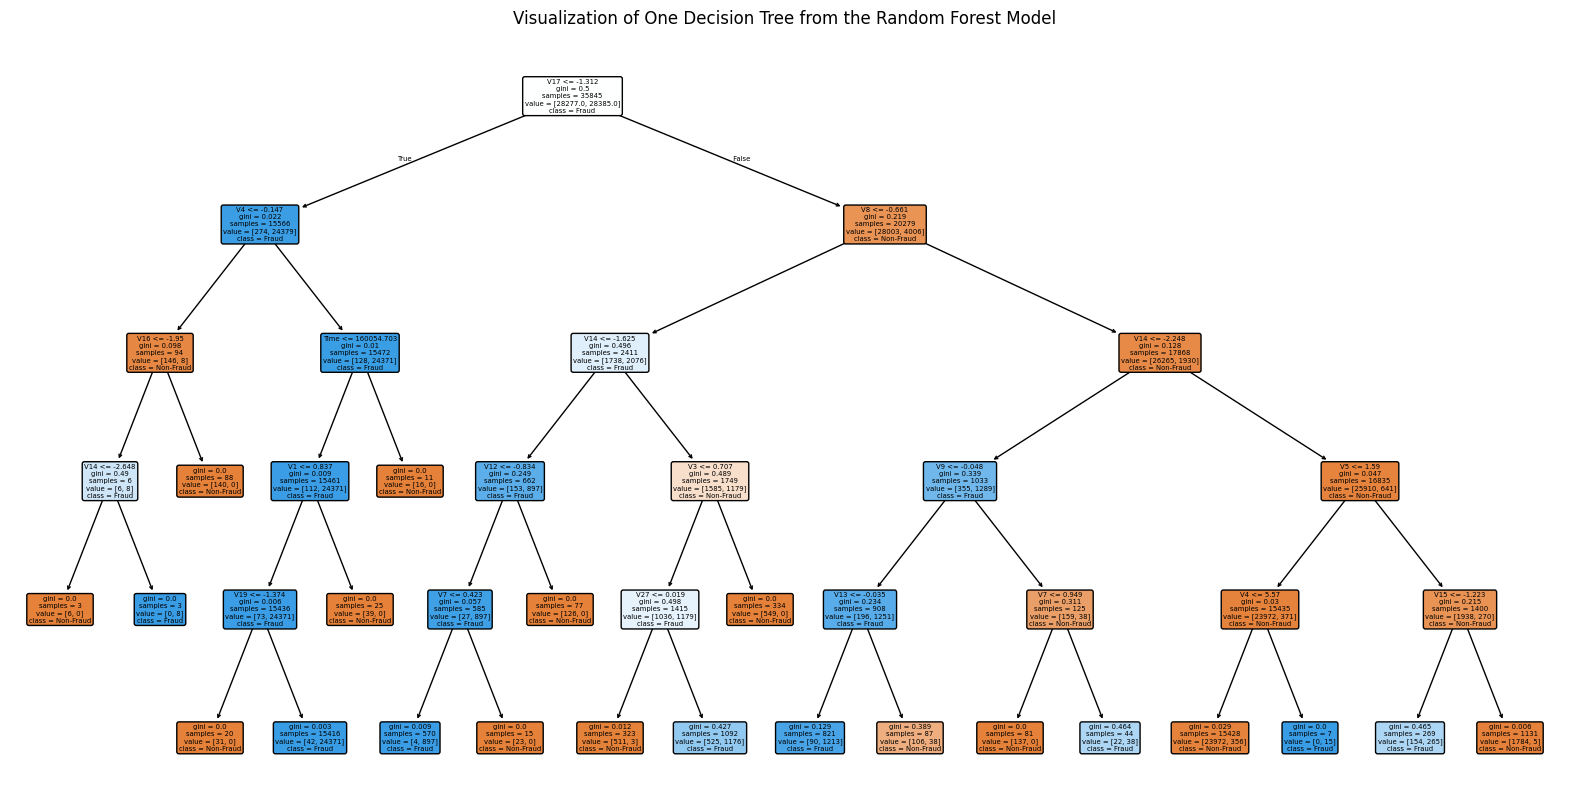

In [61]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset into dfc (ensure it's already done)


# Sample a smaller subset of the data
dfc_sample = dfc.sample(frac=0.1, random_state=42)  # Take a 10% sample

# Define features and target variable
X = dfc_sample.drop(columns=['Class'])  # Features
y = dfc_sample['Class']  # Target variable

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize and fit the Random Forest model with fewer estimators and depth
model = RandomForestClassifier(n_estimators=1, max_depth=5, random_state=42)
model.fit(X_resampled, y_resampled)

# Plot a decision tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0],
          filled=True,
          feature_names=X.columns,
          class_names=['Non-Fraud', 'Fraud'],
          rounded=True)
plt.title('Visualization of One Decision Tree from the Random Forest Model')
plt.show()



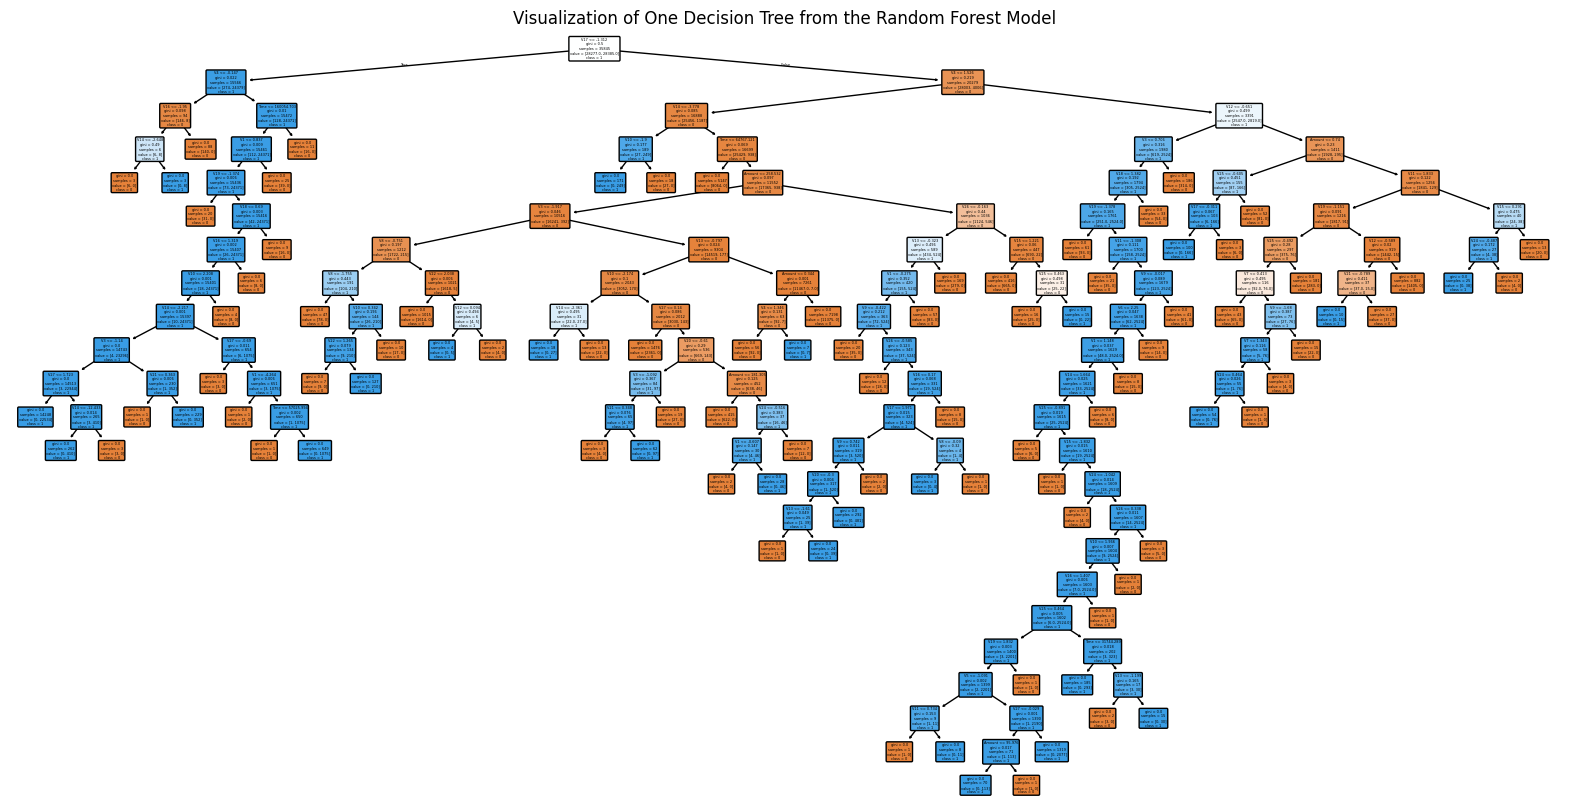

In [62]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Initialize and fit the Random Forest model
model = RandomForestClassifier(n_estimators=5, random_state=42)
# Ensure X_resampled and y_resampled are not empty and have sufficient data for training
if X_resampled.shape[0] > 0 and y_resampled.shape[0] > 0:
    model.fit(X_resampled, y_resampled)

    # Plot a decision tree from the Random Forest
    plt.figure(figsize=(20, 10))
    # Check if estimators_ is not empty before accessing its elements
    if model.estimators_:
        plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
        plt.title('Visualization of One Decision Tree from the Random Forest Model')
        plt.show()
    else:
        print("Error: No estimators found in the trained model. Check  training data.")
else:
    print("Error: Insufficient data for training. Check  resampling process.")



Each node represents a decision point based on a feature's value.
The paths represent the rules leading to different outcomes (predictions).

The leaf nodes (end nodes) indicate the predicted class for the samples reaching that node, along with the number of samples.

Use Case: Visualizing a single decision tree helps in understanding the decision-making process of the Random Forest model.

However, it's essential to remember that the strength of a Random Forest lies in its ensemble approach, averaging the predictions of many trees to improve accuracy and reduce overfitting.


**The terms cross-validation scores** and mean accuracy are essential concepts in machine learning used to evaluate the performance of a model. Let’s break down what they mean in the context of  results.

**Cross-Validation Scores**
Cross-validation is a technique used to assess how well a model generalizes to an independent dataset. The most common form is k-fold cross-validation, where the dataset is divided into k subsets (or "folds").

**The model is trained on k-1** folds and tested on the remaining fold. This process is repeated k times, each time using a different fold for testing.

**The cross-validation scores**  accuracies obtained from each of these k iterations. In this case, the scores are:

In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.99911894 0.99982379 0.99964758 0.99964751 0.99911879]
Mean accuracy: 0.9994713221604382


These values are very close to 1, indicating that the model performed exceptionally well on each of the validation sets.





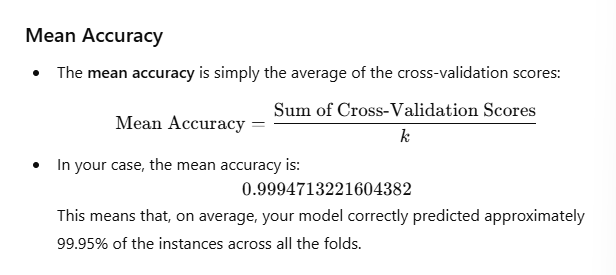


In this case, the mean accuracy is: **0.9994713221604382**. This means that, on average, the model correctly predicted approximately **99.95%** of the instances across all the folds.


**Interpretation**

**High Scores:** Both the individual cross-validation scores and the mean accuracy are extremely high (all near 1). This suggests that the model is likely to perform very well on unseen data.

**Overfitting Concern:** However, while these results are impressive, they can also raise a flag for potential overfitting.

**Overfitting** occurs when a model learns the training data too well, including its noise and outliers, making it perform poorly on new, unseen data.

**Validation:** It's important to validate these results with a separate test set to ensure that the model generalizes well.

**Next Steps**

**Check for Overfitting:** After training, evaluate your model on a separate test set (not used during training or validation) to see if the performance holds.

**Explore Hyperparameters:** Consider tuning hyperparameters further if you want to optimize performance while avoiding overfitting.

**Feature Importance:** If the model performs well, analyze which features contribute the most to predictions.

In [ ]:
# prompt: need a SHAP dashboard to check all stats of the model

# Assuming you have your trained model and X_test, y_test data available
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.9 MB/s eta 0:00:00


Training data shape: (226980, 30)
Fitting took 12.81 seconds


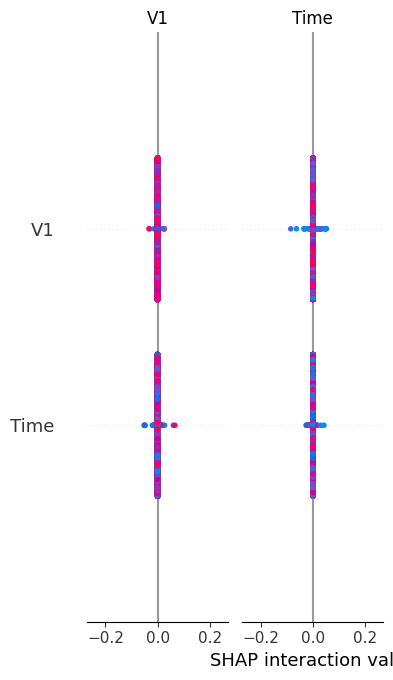

In [9]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features and target variable
X = dfc.drop('Class', axis=1)
y = dfc['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training data
print(f"Training data shape: {X_train.shape}")

# Optional: Check for NaN values
if X_train.isnull().values.any():
    print("NaN values detected in training data, filling with zeros.")
    X_train.fillna(0, inplace=True)

# Create and train your model with a smaller configuration
model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)

# Monitor fitting time
import time
start_time = time.time()
try:
    model.fit(X_train, y_train)  # Fit the model with your data
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    print(f"Fitting took {time.time() - start_time:.2f} seconds")

# If fitting is successful, calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Create the SHAP dashboard
shap.initjs()
shap.summary_plot(shap_values, X_test)




In [15]:
shap.initjs()  # Initialize the JavaScript visualization
# Assuming shap_values is a 3D array (multi-output model)
shap.force_plot(explainer.expected_value[0], shap_values[0,:,0], X_test.iloc[0])
# or for a single output model:
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


In [1]:
!pip install --upgrade nbconvert
!pip install --upgrade pandoc


Looking in indexes: https://packagemanager.posit.co/pypi/latest/simple
     ------------------------------------ 257.4/257.4 kB 832.1 kB/s eta 0:00:00
     -------------------------------------- 48.0/48.0 kB 401.3 kB/s eta 0:00:00
     -------------------------------------- 78.5/78.5 kB 874.5 kB/s eta 0:00:00
     ------------------------------------ 133.3/133.3 kB 657.9 kB/s eta 0:00:00
     -------------------------------------- 85.4/85.4 kB 478.5 kB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.1.1
    Uninstalling traitlets-5.1.1:
      Successfully uninstalled traitlets-5.1.1
  Attempting uninstall: mistune
    Found existing installation: mistune 0.8.4
    Uninstalling mistune-0.8.4:
      Successfully uninstalled mistune-0.8.4
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
  Attempting uninstall: jupyter-core
    Found existin

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.11 which is incompatible.
distributed 2022.7.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.4.1 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.10.4 which is incompatible.
conda-repo-cli 1.0.20 requires PyYAML==6.0, but you have pyyaml 6.0.2 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


Looking in indexes: https://packagemanager.posit.co/pypi/latest/simple
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 128.0/128.0 kB 503.1 kB/s eta 0:00:00
     -------------------------------------- 49.6/49.6 kB 504.2 kB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34797 sha256=1314cb1a4bfd65b01c948af779c1cf972506911ac5c5e5b009cb98dd07acf580
  Stored in directory: c:\users\silvi\appdata\local\pip\cache\wheels\9a\a6\94\160693c31d1445aadb708a90b571c31e34b6bbffb184545292
Successfully built pandoc


In [2]:
!pip install --upgrade nbconvert jupyter


Looking in indexes: https://packagemanager.posit.co/pypi/latest/simple
  Attempting uninstall: jupyter
    Found existing installation: jupyter 1.0.0
    Uninstalling jupyter-1.0.0:
      Successfully uninstalled jupyter-1.0.0


In [5]:
import nbformat
from nbconvert import PDFExporter

# Load the notebook
with open('credit_card_fraud_detection_Copy (1) - Copy.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

# Create a PDF exporter
pdf_exporter = PDFExporter()
pdf_data, resources = pdf_exporter.from_notebook_node(nb)

# Write the PDF to a file
with open('output.pdf', 'wb') as f:
    f.write(pdf_data)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 494215: character maps to <undefined>